# Quick Data Visualisation

This code is meant for data visualisation

Input: 2 csv files, one for IMU and one for EMG <br>
Output: plot the file

### <b> --- Functions ---

In [1]:
#imports
import scipy
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

from scipy.fft import fft, fftfreq, rfft, rfftfreq
from scipy.signal import butter, filtfilt


In [2]:
# Function defintions:

def time_to_sec(time):
    
    #input: time array in ms starting at any point
    #returns: time array in second and starting at 0
    
    time_size = time.size
    og_time = time[0]
    new_time = [0]*time_size

    for i in range(0,time_size):
        new_time[i] = (time[i]-og_time)/1000
        
    return new_time


def rename_columns(dataframe,new_names):
    
    #input: the dataframe and the list of new names for the columns
    #output: the same dataframe with the new column names
    
    new_frame = dataframe
    
    old_names = dataframe.columns
    
    for n in range(0,len(old_names)):
        new_frame.rename(columns={old_names[n]: new_names[n]}, inplace=True)
        
    return new_frame


def plot_IMU(IMU_dataframe):
    
    #input: IMU dataframe with adapted column names
    #return: plots the data
    
    IMU_time = time_to_sec(IMU_dataframe.time)
    ylabels = IMU_dataframe.columns
    
    fig, axs = plt.subplots(6,figsize=(16,12))
    axs[0].plot(IMU_time,IMU_dataframe.x_acc)
    axs[1].plot(IMU_time,IMU_dataframe.y_acc)
    axs[2].plot(IMU_time,IMU_dataframe.z_acc)
    axs[3].plot(IMU_time,IMU_dataframe.x_rot)
    axs[4].plot(IMU_time,IMU_dataframe.y_rot)
    axs[5].plot(IMU_time,IMU_dataframe.z_rot)
    
    axs[5].set_xlabel('time in s')
        
    for k in range(0,6):
        axs[k].set_ylabel(ylabels[k+1])
        axs[k].grid()
    
    plt.show()
    
    
def plot_EMG(EMG_dataframe):
    
    #input: EMG dataframe with adapted column names
    #return: plots the data
    
    EMG_time = time_to_sec(EMG_dataframe.time)
    ylabels = EMG_dataframe.columns
    
    fig, axs = plt.subplots(4,figsize=(16,8))
    axs[0].plot(EMG_time,EMG_dataframe.ch1)
    axs[1].plot(EMG_time,EMG_dataframe.ch2)
    axs[2].plot(EMG_time,EMG_dataframe.ch3)
    axs[3].plot(EMG_time,EMG_dataframe.ch4)
    
    axs[3].set_xlabel('time in s')
    
    for k in range(0,4):
        axs[k].set_ylabel(ylabels[k+3])
        axs[k].grid()
    
    plt.show()
    
def IMU_reader(IMU_csv):
    
    #input: raw IMU .csv data as received from shimmers3 IMU sensor
    #return: IMU data ready for next steps

    IMU_columns = ['time', 'x_acc', 'y_acc', 'z_acc', 'x_rot', 'y_rot', 'z_rot','NaN']
    
    IMU_data = pd.read_csv(IMU_csv,skiprows=[0,1])
    
    new_IMU = rename_columns(IMU_data,IMU_columns)
    
    return(new_IMU)
    
    
def EMG_reader(EMG_csv):
    
    #input: raw EMG .csv data as received from shimmers3 IMU sensor
    #return: EMG data ready for next steps

    EMG_columns = ['time', 'CAL1', 'CAL2', 'ch1', 'ch2', 'ch3', 'ch4', 'NaN'] 
    
    EMG_data = pd.read_csv(EMG_csv,skiprows=[0,1])
    
    new_EMG = rename_columns(EMG_data,EMG_columns)
    
    return(new_EMG)


# Import function:
def import_data(s_nbr,m_nbr,side):
    
    #input: subject nbr, motion nbr, side(r or l)
    #returns: corresponding EMG and IMU files

    EMG_dir = "data/s" + str(s_nbr) + "_m" + str(m_nbr) + "_" + side + "/emg_s" + str(s_nbr) + "_m" + str(m_nbr) + "_" + side + ".csv" 
    IMU_dir = "data/s" + str(s_nbr) + "_m" + str(m_nbr) + "_" + side + "/imu_s" + str(s_nbr) + "_m" + str(m_nbr) + "_" + side + ".csv"
    
    EMG = EMG_reader(EMG_dir)
    IMU = IMU_reader(IMU_dir)
    
    return EMG,IMU


## <b> --- VISUALISATION ---

In [3]:
#Define constants:
fs = 512 #Hz  (sample frequency)


#Import the data at subject,motion,side:
subject_number = 3
motion_number = 6
side = 'l' #please use 'r' or 'l'


EMG,IMU = import_data(subject_number,motion_number,side)

### <u> <b> EMG

In [4]:
EMG

,time,CAL1,CAL2,ch1,ch2,ch3,ch4,NaN
0,1.700130e+12,128.0,128.0,-3.907910,-12.332149,-16.240060,-28.523167,NaN
1,1.700130e+12,128.0,128.0,-3.826557,-12.436437,-16.262995,-28.563338,NaN
2,1.700130e+12,128.0,128.0,-3.797636,-12.463122,-16.260759,-28.534634,NaN
3,1.700130e+12,128.0,128.0,-3.754003,-12.497957,-16.251960,-28.515810,NaN
4,1.700130e+12,128.0,128.0,-3.746502,-12.515771,-16.262273,-28.534634,NaN
...,...,...,...,...,...,...,...,...
21816,1.700130e+12,128.0,128.0,-6.871172,-7.481681,-14.352853,-29.701418,NaN
21817,1.700130e+12,128.0,128.0,-6.858551,-7.471656,-14.330207,-29.678339,NaN
21818,1.700130e+12,128.0,128.0,-6.859632,-7.475190,-14.334823,-29.651798,NaN
21819,1.700130e+12,128.0,128.0,-6.855594,-7.503895,-14.359488,-29.695071,NaN


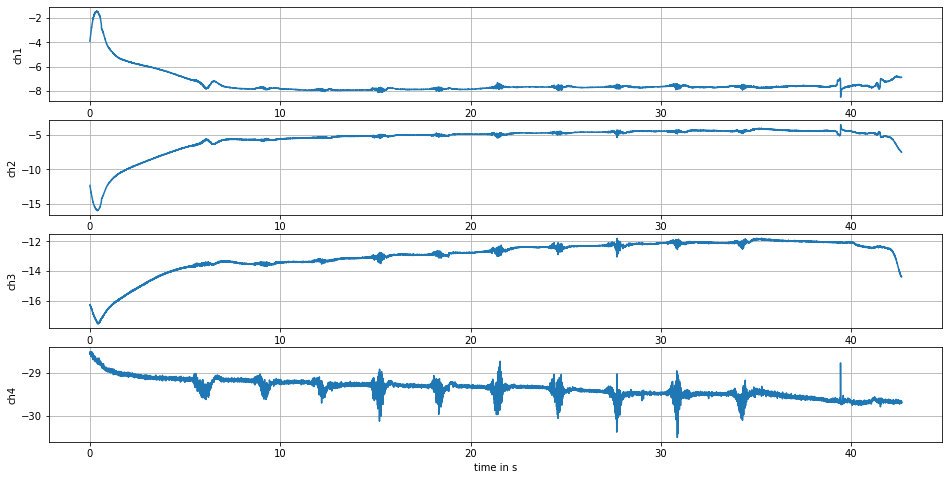

In [5]:
plot_EMG(EMG)


### <u> <b> IMU

In [6]:
IMU

,time,x_acc,y_acc,z_acc,x_rot,y_rot,z_rot,NaN
0,1.700130e+12,3.369565,1.456522,11.847826,-163.679389,-262.015267,260.534351,NaN
1,1.700130e+12,3.489130,0.510870,10.967391,262.641221,-262.015267,-410.305344,NaN
2,1.700130e+12,3.565217,0.586957,10.934783,-163.679389,-262.015267,260.534351,NaN
3,1.700130e+12,3.619565,0.597826,10.880435,262.641221,-262.015267,-410.305344,NaN
4,1.700130e+12,3.847826,0.597826,10.913043,-163.679389,-262.015267,260.534351,NaN
...,...,...,...,...,...,...,...,...
2224,1.700130e+12,1.423913,0.467391,10.521739,-163.679389,-262.015267,260.534351,NaN
2225,1.700130e+12,1.847826,1.065217,10.782609,262.641221,-262.015267,-410.305344,NaN
2226,1.700130e+12,2.163043,1.293478,12.423913,-163.679389,-262.015267,260.534351,NaN
2227,1.700130e+12,2.097826,0.521739,11.760870,262.641221,-262.015267,-410.305344,NaN


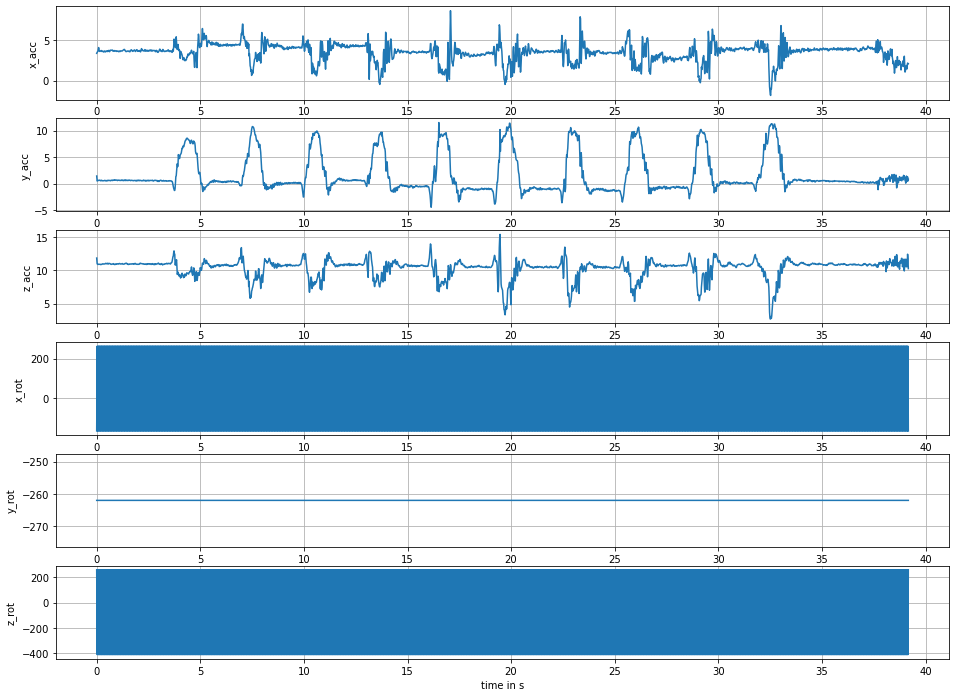

In [7]:
plot_IMU(IMU)